In [32]:
import time
import psutil
import numpy as np
import pandas as pd
import multiprocessing as mp
from math import sin, cos, sqrt, atan2, radians
import uuid
from dask.delayed import delayed
import dask.dataframe as dd
from dask import compute
import uuid

In [33]:
import dask.multiprocessing

In [3]:
#df = pd.read_csv('yellow_tripdata_2015-01-06.csv', nrows=100, parse_dates=['tpep_pickup_datetime'], index_col = 'tpep_pickup_datetime')

In [4]:
#df = pd.read_csv('yellow_tripdata_2015-01-06.csv', chunksize=100000, parse_dates=['tpep_pickup_datetime'], index_col = 'tpep_pickup_datetime')


In [5]:
#df_list = []
#for chunk in df:
    #x=chunk.sample(n=3000)
    #df_list.append(x)
    
#df_concat = pd.concat(df_list)
#df_concat.to_csv('sample_taxi_tripdata_2.csv')

In [6]:
#df.head()

In [7]:
#df = pd.read_csv('sample_taxi_tripdata.csv')

In [8]:
#df.head()

In [9]:
#index_col=[]
#for i in range(len(df)):
    #x = uuid.uuid4()
    #x = str(x)
    #index_col.append(x)
#df['index'] = index_col
#df=df.set_index('index')


In [10]:
#df.to_csv('sample_taxi_tripdata_id.csv')

In [34]:
df=pd.read_csv('sample_taxi_tripdata_id.csv',parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], index_col ='tpep_pickup_datetime')

In [14]:
df.head()

,index,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-01-09 03:03:57,15685926-bc9d-44cf-9a75-f962d2a1a67b,1,2015-01-09 03:22:46,2,6.60,-73.957489,40.718201,1,N,-73.880501,40.749363,1,22.0,0.5,0.5,0.00,0.0,23.30
2015-01-09 08:00:20,21091b8b-24fa-4d85-8e4e-6a28502f7a6b,2,2015-01-09 08:02:20,1,0.18,-73.946335,40.772732,1,N,-73.949013,40.774277,2,3.0,0.0,0.5,0.00,0.0,3.80
2015-01-09 07:16:53,809dc17f-4cd2-4258-99cb-556c3230bcd4,2,2015-01-09 07:47:16,1,4.40,-73.975174,40.755310,1,N,-73.965797,40.803917,1,20.5,0.0,0.5,1.00,0.0,22.30
2015-01-01 03:10:08,b05989c5-bb93-4704-87e4-1b65d244f450,1,2015-01-01 03:24:19,2,4.80,-73.999664,40.744183,1,N,-73.969406,40.798218,1,15.2,0.5,0.5,4.12,0.0,20.62
2015-01-09 08:07:04,152582fe-6dfa-4b38-b6c6-2c7710ea7a0a,2,2015-01-09 08:18:28,2,0.75,-73.867775,40.840214,1,N,-73.879715,40.840279,2,8.0,0.0,0.5,0.00,0.0,8.80


In [13]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
count,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06,1.001000e+06
mean,1.520881e+00,1.675364e+00,2.969769e+00,-7.269689e+01,4.004734e+01,1.040157e+00,-7.273363e+01,4.006811e+01,1.377841e+00,1.269559e+01,3.143171e-01,4.976893e-01,1.678137e+00,2.902126e-01,1.577570e+01
std,4.995640e-01,1.332289e+00,3.420684e+01,9.635699e+00,5.308240e+00,6.722346e-01,9.525979e+00,5.233354e+00,4.980467e-01,1.067468e+01,3.692614e-01,5.053261e-02,2.457738e+00,1.814697e+00,1.308947e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,-8.173175e+01,0.000000e+00,1.000000e+00,-7.817167e+02,0.000000e+00,1.000000e+00,-2.180000e+02,-5.670000e+01,-5.000000e-01,-1.167000e+01,-5.540000e+00,-2.188000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399181e+01,4.073550e+01,1.000000e+00,-7.399124e+01,4.073418e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,8.400000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398154e+01,4.075306e+01,1.000000e+00,-7.397957e+01,4.075364e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.150000e+00,0.000000e+00,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.190000e+00,-7.396638e+01,4.076777e+01,1.000000e+00,-7.396210e+01,4.076892e+01,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.260000e+00,0.000000e+00,1.775000e+01
max,2.000000e+00,7.000000e+00,3.008320e+04,0.000000e+00,5.747092e+01,9.900000e+01,0.000000e+00,4.901802e+01,5.000000e+00,9.000000e+02,4.005000e+01,2.880000e+01,3.330000e+02,8.868800e+02,9.606800e+02


In [14]:
df.head()

,index,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-01-09 03:03:57,15685926-bc9d-44cf-9a75-f962d2a1a67b,1,2015-01-09 03:22:46,2,6.60,-73.957489,40.718201,1,N,-73.880501,40.749363,1,22.0,0.5,0.5,0.00,0.0,23.30
2015-01-09 08:00:20,21091b8b-24fa-4d85-8e4e-6a28502f7a6b,2,2015-01-09 08:02:20,1,0.18,-73.946335,40.772732,1,N,-73.949013,40.774277,2,3.0,0.0,0.5,0.00,0.0,3.80
2015-01-09 07:16:53,809dc17f-4cd2-4258-99cb-556c3230bcd4,2,2015-01-09 07:47:16,1,4.40,-73.975174,40.755310,1,N,-73.965797,40.803917,1,20.5,0.0,0.5,1.00,0.0,22.30
2015-01-01 03:10:08,b05989c5-bb93-4704-87e4-1b65d244f450,1,2015-01-01 03:24:19,2,4.80,-73.999664,40.744183,1,N,-73.969406,40.798218,1,15.2,0.5,0.5,4.12,0.0,20.62
2015-01-09 08:07:04,152582fe-6dfa-4b38-b6c6-2c7710ea7a0a,2,2015-01-09 08:18:28,2,0.75,-73.867775,40.840214,1,N,-73.879715,40.840279,2,8.0,0.0,0.5,0.00,0.0,8.80


In [15]:
df['month']=df.index.month
df['hour']=df.index.hour

In [16]:
df.groupby('month').size().plot()

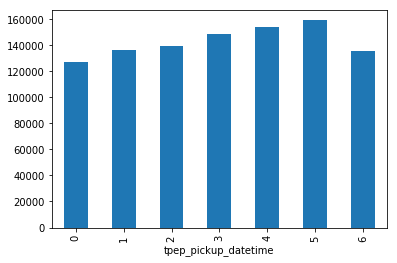

In [17]:
df.groupby(df.index.dayofweek).size().plot(kind='bar')

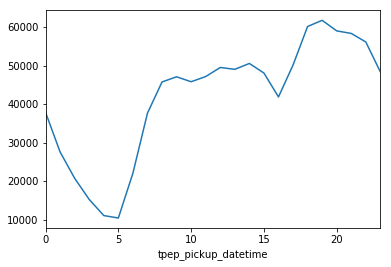

In [18]:
df.groupby(df.index.hour).size().plot()

In [28]:
df_sample = df.sample(n=100000)

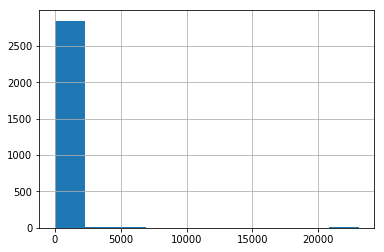

In [43]:
(df.groupby(df.trip_distance)).size().hist()

In [35]:
df[(df.trip_distance > 1000)]

,index,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,total_amount,month,hour
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,,,
2015-02-06 00:27:05,dcea89f2-f298-485a-9cdb-8133365567e5,1,2015-02-06 00:34:59,1,30083.2,-73.992554,40.751667,1,N,-73.980774,40.742451,1,7.0,0.5,0.5,1.0,0.0,9.3,2,0
2015-02-06 08:41:59,2f9db1a8-8cf5-4b25-9336-730905be2687,1,2015-02-06 08:58:25,1,15801.0,-73.996262,40.758476,1,N,-73.948593,40.809052,1,19.5,0.0,0.5,0.0,0.0,20.3,2,8
2015-06-04 09:20:27,fd33f698-268d-4392-9600-eb599b8c5a9a,1,2015-06-04 09:32:18,1,1990.6,-73.991653,40.744507,1,N,-73.976555,40.748043,2,8.5,0.0,0.5,0.0,0.0,9.3,6,9


In [37]:
len(df[(df.trip_distance > 100)])

18

In [39]:
df = df[(df.trip_distance < 100)]

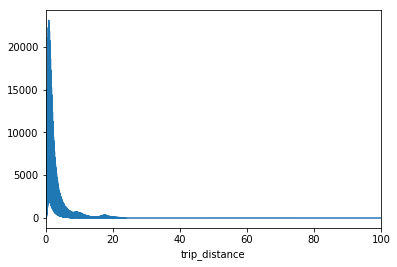

In [41]:
(df.groupby(df.trip_distance)).size().plot()

In [35]:
def distance(lon1, lat1, lon2, lat2):
    R = 6373.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

In [37]:
import multiprocessing as mp

# Step 1: Init multiprocessing.Pool()
pool = mp.Pool(mp.cpu_count())

# Step 2: `pool.apply` the `howmany_within_range()`
#results = [pool.apply(howmany_within_range, args=(row, 4, 8)) for row in data]

# Step 3: Don't forget to close
#pool.close()    

In [ ]:
print(len(pool))

In [36]:
def find_canidates(df):
    df=df.set_index('index')
    dict_canidates = {}
    for index, row in df.iterrows():
        for index_2, row_2 in df.iterrows():
            cumalative_traveled = distance(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']) + distance(row_2['pickup_longitude'], row_2['pickup_latitude'], row_2['dropoff_longitude'], row_2['dropoff_latitude'])
            distance_start = distance(row['pickup_longitude'], row['pickup_latitude'], row_2['pickup_longitude'], row_2['pickup_latitude'])
            distance_stop =  distance(row['dropoff_longitude'], row['dropoff_latitude'], row_2['dropoff_longitude'], row_2['dropoff_latitude'])
            total_distance = distance_start + distance_stop
            if total_distance == 0:
                pass
            elif index in dict_canidates: 
                 dict_canidates[index][index_2] = [total_distance, cumalative_traveled]
                
            else:
                dict_canidates[index] = {}
                dict_canidates[index][index_2] = [total_distance, cumalative_traveled]
    return dict_canidates
                

In [48]:
dict_canidates_sample = find_canidates(df.sample(1000))

In [49]:
import json
with open('dict_canidates_sample.txt', 'w') as file:
     file.write(json.dumps(dict_canidates_sample)) 